In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler

# Deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [2]:
# Load processed data and show some values
df = pd.read_csv("../data/processed/AEP_hourly_processed.csv", index_col="Datetime", parse_dates=True)
df.head()

,AEP_MW,AEP_MW_scaled,Hour,Day of week,is_weekend,Month,Year,Season_fall,Season_spring,Season_summer,...,AEP_MW_scaled_lag_15,AEP_MW_scaled_lag_16,AEP_MW_scaled_lag_17,AEP_MW_scaled_lag_18,AEP_MW_scaled_lag_19,AEP_MW_scaled_lag_20,AEP_MW_scaled_lag_21,AEP_MW_scaled_lag_22,AEP_MW_scaled_lag_23,AEP_MW_scaled_lag_24
Datetime,,,,,,,,,,,,,,,,,,,,,
2004-10-02 01:00:00,12260.0,0.142129,1,5,1,10,2004,True,False,False,...,0.393183,0.374297,0.349262,0.267920,0.143886,0.091268,0.083890,0.092235,0.113580,0.152583
2004-10-02 02:00:00,11672.0,0.090478,2,5,1,10,2004,True,False,False,...,0.404076,0.393183,0.374297,0.349262,0.267920,0.143886,0.091268,0.083890,0.092235,0.113580
2004-10-02 03:00:00,11352.0,0.062368,3,5,1,10,2004,True,False,False,...,0.415759,0.404076,0.393183,0.374297,0.349262,0.267920,0.143886,0.091268,0.083890,0.092235
2004-10-02 04:00:00,11177.0,0.046996,4,5,1,10,2004,True,False,False,...,0.418306,0.415759,0.404076,0.393183,0.374297,0.349262,0.267920,0.143886,0.091268,0.083890
2004-10-02 05:00:00,11142.0,0.043921,5,5,1,10,2004,True,False,False,...,0.440355,0.418306,0.415759,0.404076,0.393183,0.374297,0.349262,0.267920,0.143886,0.091268


In [3]:
# Target
y = df["AEP_MW_scaled"].values

# Features
X= df.drop(columns=["AEP_MW", "AEP_MW_scaled"]).values

# Divide train and test data using time series split
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("Root mean square error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean absolute error: 0.013141311471962822
Root mean square error: 0.01793988913255328


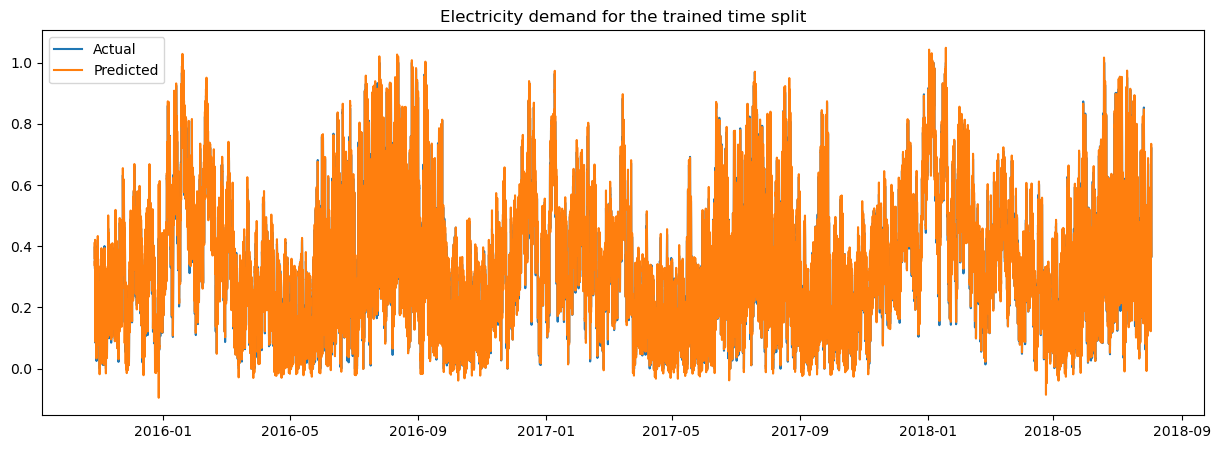

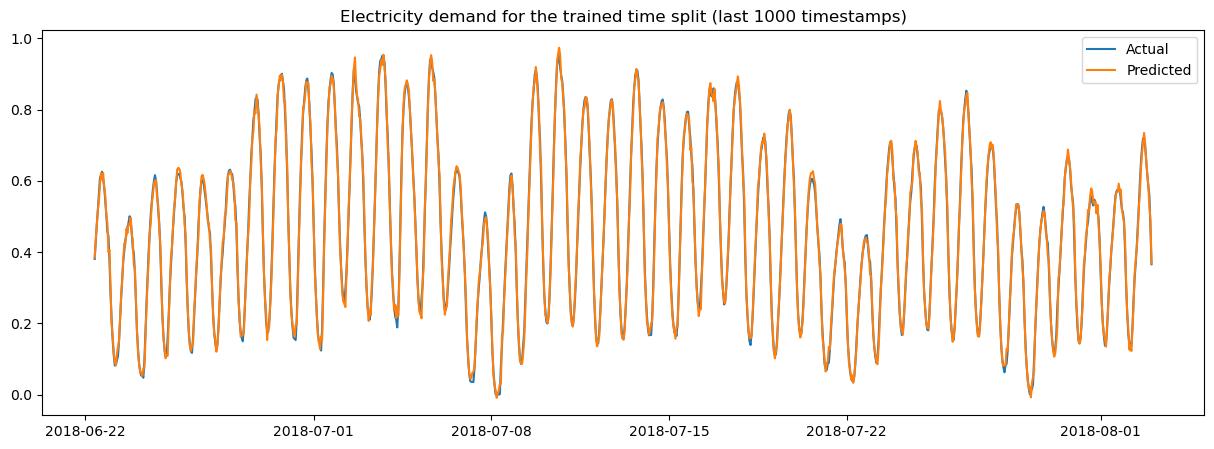

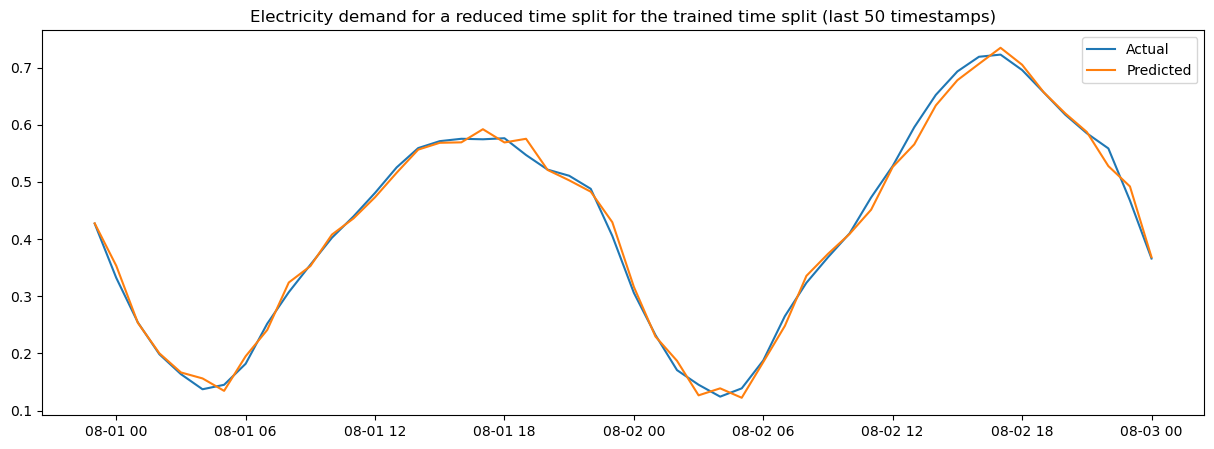

In [31]:
plt.figure(figsize=(15,5))
plt.plot(df.index[train_size:], y_test, label="Actual")
plt.plot(df.index[train_size:], y_pred, label="Predicted")
plt.title("Electricity demand for the trained time split")
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(df.index[-1000:], y_test[-1000:], label="Actual")
plt.plot(df.index[-1000:], y_pred[-1000:], label="Predicted")
plt.title("Electricity demand for the trained time split (last 1000 timestamps)")
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(df.index[-50:], y_test[-50:], label="Actual")
plt.plot(df.index[-50:], y_pred[-50:], label="Predicted")
plt.title("Electricity demand for a reduced time split for the trained time split (last 50 timestamps)")
plt.legend()
plt.show()

## Random Forest Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("Root mean square error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean absolute error: 0.010897602199805793
Root mean square error: 0.015204679011633578


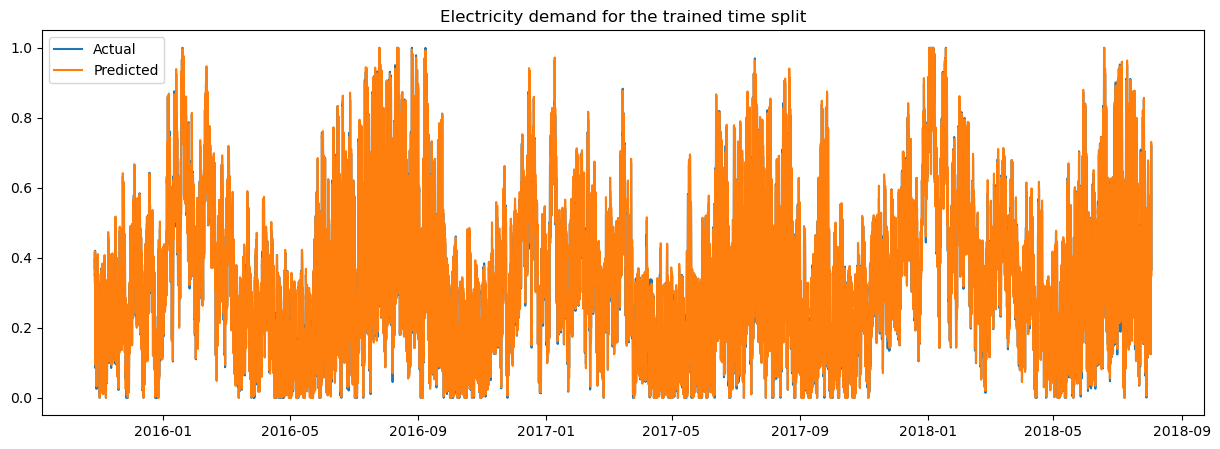

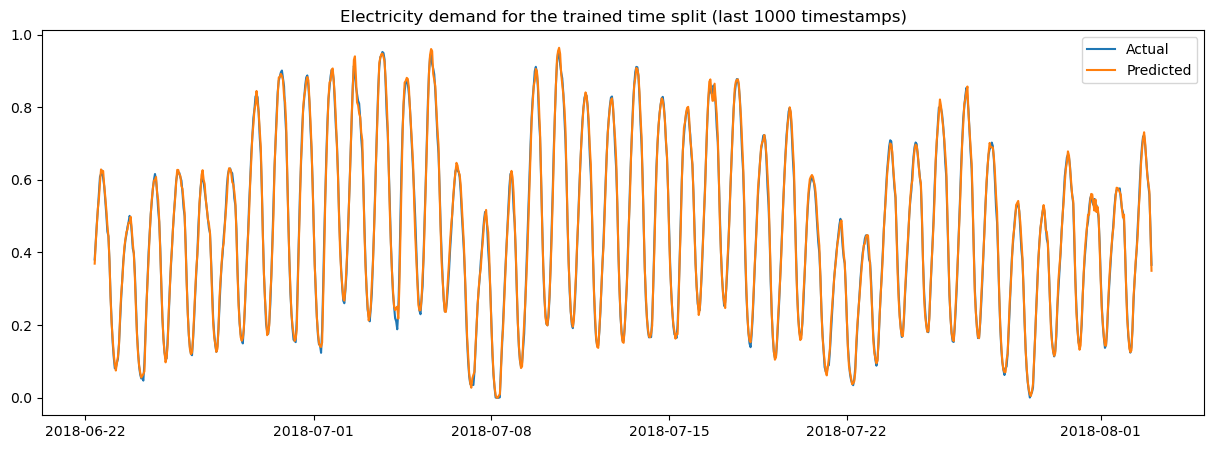

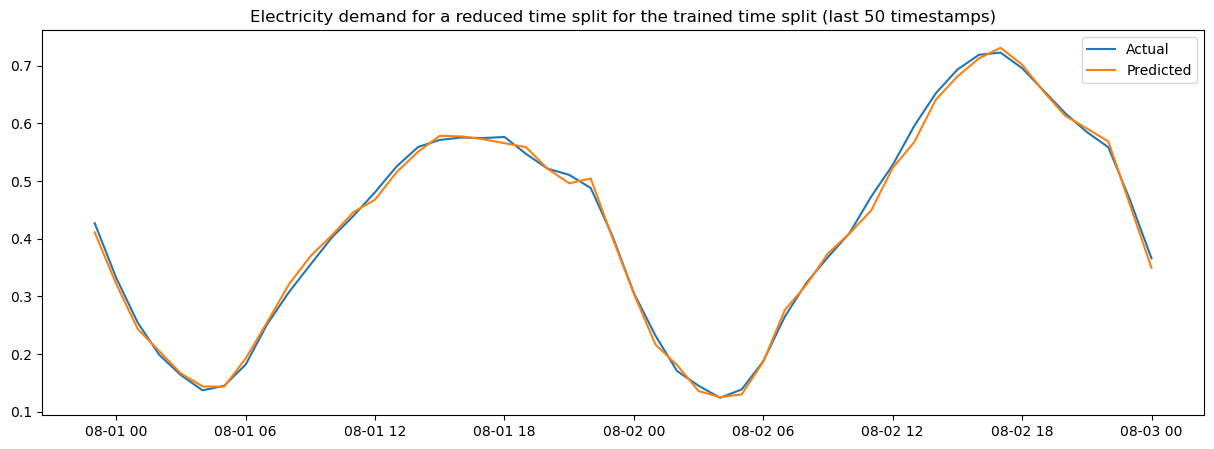

In [29]:
plt.figure(figsize=(15,5))
plt.plot(df.index[train_size:], y_test, label="Actual")
plt.plot(df.index[train_size:], y_pred, label="Predicted")
plt.title("Electricity demand for the trained time split")
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(df.index[-1000:], y_test[-1000:], label="Actual")
plt.plot(df.index[-1000:], y_pred[-1000:], label="Predicted")
plt.title("Electricity demand for the trained time split (last 1000 timestamps)")
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(df.index[-50:], y_test[-50:], label="Actual")
plt.plot(df.index[-50:], y_pred[-50:], label="Predicted")
plt.title("Electricity demand for a reduced time split for the trained time split (last 50 timestamps)")
plt.legend()
plt.show()

## XGBoost Regression